## Does the air pollution of a country have a direct influence on the annual average temperature?

### 1. Business Understanding:
We all know that air pollution is a factor in climate change. What we also know is that this is a global problem. But could it also be that the emissions of a country could already have a direct influence on the annual average temperature of that country? 
With data from the Community Emissions Data System (CEDS) and temperature data from FAOSTAT Temperature Change, this statement will be verified within a CRISP-DM analysis.

<cite>CEDS: https://github.com/JGCRI/CEDS</cite>

<cite>FAOSTAT: https://www.fao.org/faostat</cite>

<cite>Data Sources</cite>

<cite>CEDS-Data: https://ourworldindata.org/explorers/air-pollution</cite>

<cite>FAOSTAT-Temperature-Data: https://www.fao.org/faostat/en/#data/ET</cite>

### 2. Data Understanding

In [35]:
# basic imports
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn
import pandas as pd
import os
import plotly
plotly.offline.init_notebook_mode()
import plotly.express as px

# base path
system_user = os.getenv('USER')
base_path = "/home/" + system_user + "/DEV/Demos/ppyds/ppyds_project/data"

#### 2.1 Data Understanding - Emmisions data (CEDS)

In [36]:
# load emmisions data
df_emmisions =  pd.read_csv(base_path+"/air-pollution_2019.csv", sep=',')

In [37]:
df_emmisions.sample(5)

Nitrogen oxide (NOx)  Sulphur dioxide (SO₂)  Carbon monoxide (CO)  \
32566           4476.398366             506.743916          2.757455e+04   
33980            691.262225             790.298261          1.380749e+05   
11095         101847.137733           41169.692886          3.554590e+06   
38075          79915.585610          315638.909232          4.648506e+05   
22093            384.956356             298.918611          6.984918e+02   

       Organic carbon (OC)         NMVOCs  Black carbon (BC)  Ammonia (NH₃)  \
32566            22.908995    8291.836127          15.382827      49.859030   
33980          2294.026096   11834.260339         243.551963    9485.362438   
11095        234841.328412  816262.952498       60664.535114  244719.819725   
38075         17853.456420  119959.993522        3801.165700   36057.065365   
22093           155.550794     443.053720          43.580147     376.155331   

                             Entity  Year  
32566                         Palau  1966  
33980                      Portugal  1805  
11095  Democratic Republic of Congo  2010  
38075                      Slovakia  1965  
22093                      Kiribati  2003

In [38]:
df_emmisions.info()
print("shape:", df_emmisions.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47535 entries, 0 to 47534
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Nitrogen oxide (NOx)   47535 non-null  float64
 1   Sulphur dioxide (SO₂)  47535 non-null  float64
 2   Carbon monoxide (CO)   47535 non-null  float64
 3   Organic carbon (OC)    47535 non-null  float64
 4   NMVOCs                 47535 non-null  float64
 5   Black carbon (BC)      47535 non-null  float64
 6   Ammonia (NH₃)          47535 non-null  float64
 7   Entity                 47535 non-null  object 
 8   Year                   47535 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 3.3+ MB
shape: (47535, 9)


In [39]:
df_emmisions.describe()

Nitrogen oxide (NOx)  Sulphur dioxide (SO₂)  Carbon monoxide (CO)  \
count          4.753500e+04           4.753500e+04          4.753500e+04   
mean           5.260436e+05           7.992584e+05          5.173733e+06   
std            4.332972e+06           5.743331e+06          3.059404e+07   
min            0.000000e+00           0.000000e+00          0.000000e+00   
25%            1.548467e+02           6.235476e+01          1.469565e+04   
50%            1.689596e+03           8.450006e+02          1.163538e+05   
75%            2.899340e+04           3.199098e+04          6.540220e+05   
max            1.095663e+08           1.335263e+08          6.616236e+08   

       Organic carbon (OC)        NMVOCs  Black carbon (BC)  Ammonia (NH₃)  \
count         4.753500e+04  4.753500e+04       4.753500e+04   4.753500e+04   
mean          1.302651e+05  8.868047e+05       4.678637e+04   3.417240e+05   
std           6.744725e+05  5.927514e+06       2.771701e+05   2.250404e+06   
min           0.000000e+00  0.000000e+00       0.000000e+00   0.000000e+00   
25%           6.073753e+02  2.245105e+03       1.514704e+02   1.399557e+03   
50%           4.364754e+03  1.728262e+04       1.065555e+03   9.817929e+03   
75%           2.160645e+04  1.139918e+05       6.333218e+03   5.276752e+04   
max           1.401013e+07  1.468331e+08       6.314146e+06   6.142059e+07   

               Year  
count  47535.000000  
mean    1909.436731  
std       66.777467  
min     1750.000000  
25%     1853.000000  
50%     1912.000000  
75%     1968.000000  
max     2019.000000

1. Nitrogen oxides (NOx) - gases consisting of nitrogen and oxygen, cause smog and acid rain, are emitted by vehicles and industrial processes.

2. Sulphur dioxide (SO2) - a colourless gas, causes acid rain, emitted from burning fossil fuels, especially coal.

3. Carbon monoxide (CO) - a colourless and odourless gas, toxic to humans, emitted from vehicles and the incomplete combustion of fossil fuels.

4. Organic carbon (OC) - a form of carbon, major component of particulate matter, emitted from vehicles and industrial processes.

5. NMVOCs (Non-Methane Volatile Organic Compounds) - a group of organic gases that contribute to the formation of smog and particulate matter and are emitted by industrial processes, vehicles and solvents.

6. Black carbon (BC) - a type of particulate matter composed mainly of carbon and produced by the incomplete combustion of fossil fuels, biofuels and biomass.

7. Ammonia (NH3) - colourless, strong-smelling gas that contributes to particulate matter and acid rain and is released by agricultural activities, especially livestock and fertilisers, industry and waste management.

<cite>(Hoesly et al, Historical (1750–2014) anthropogenic emissions of reactive gases and aerosols from the Community Emissions Data System (CEDS). Geosci. Model Dev. 11, 369-408, 2018a.)</cite>

<AxesSubplot:>

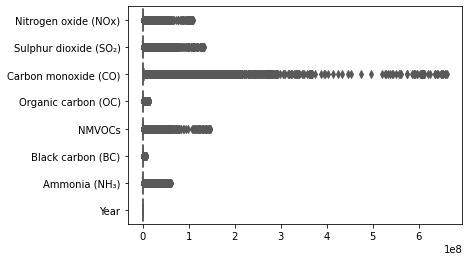

In [40]:
sn.boxplot(data=df_emmisions, orient="h", palette="Set2")

Lets use the zscore to see the scattering of the column values in the dataframe

In [41]:
from scipy.stats import zscore

In [42]:
def abs_zscore(x):
    return np.abs(zscore(x))

df_numeric = df_emmisions.select_dtypes(include=np.number)

df_zscore = df_numeric.apply(abs_zscore)

In [43]:
threshold = 5
outliers = df_emmisions[(df_zscore>threshold).any(axis='columns')]
none_outliers = df_emmisions[~(df_zscore>threshold).any(axis='columns')]

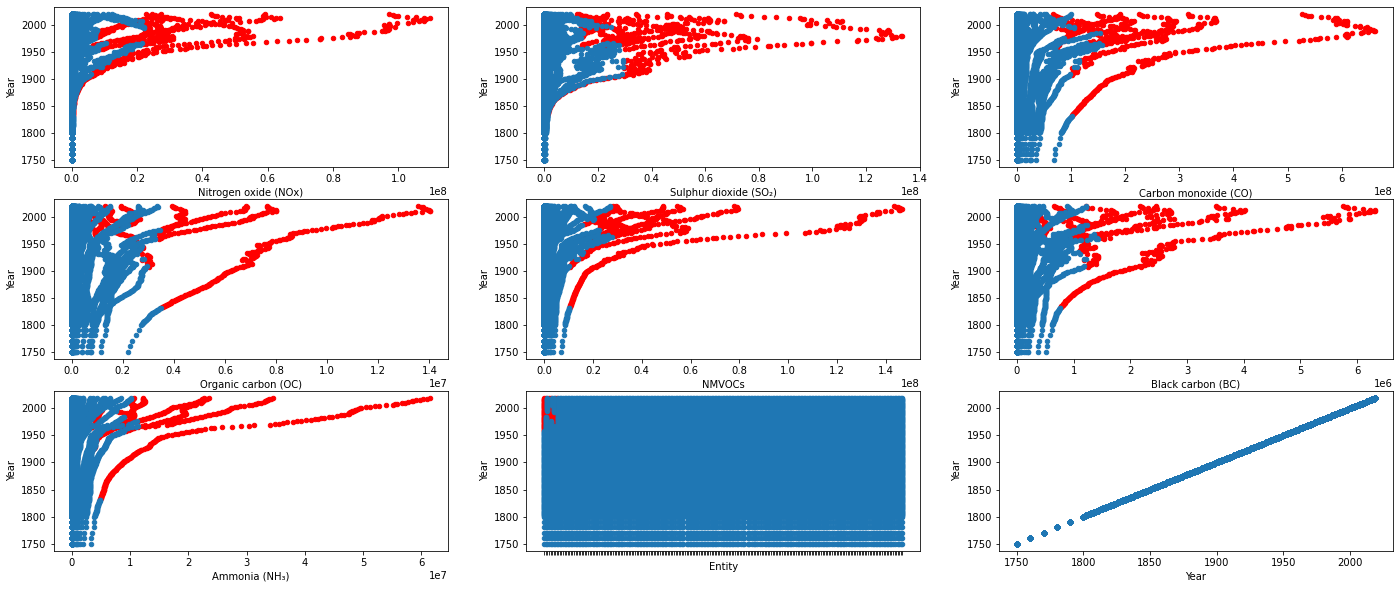

In [44]:

def plot_outliers(outliers, none_outliers, number_of_cols, number_of_rows, figsize=(24, 10)):
    fig, axes = plt.subplots(number_of_cols, number_of_rows, figsize=figsize)
    axe = axes.ravel()

    # assign the plot to each subplot in axe
    for i, c in enumerate(outliers.columns):
        outliers[[c, 'Year']].plot(kind='scatter', x=c, y='Year', ax=axe[i], color='red')
        none_outliers[[c, 'Year']].plot(kind='scatter', x=c, y='Year', ax=axe[i])
        if c == 'Entity':
            axe[i].set(xticklabels=[])

plot_outliers(outliers, none_outliers, 3, 3, (24, 10))

In [45]:
# get outlier values of Entity
unique_entities = outliers['Entity'].unique()

unique_entities, outliers[['Carbon monoxide (CO)', 'Year', 'Entity']].describe()

(array(['Asia', 'China', 'Europe', 'High-income countries',
        'Lower-middle-income countries', 'North America', 'United States',
        'Upper-middle-income countries', 'World'], dtype=object),
        Carbon monoxide (CO)         Year
 count          5.950000e+02   595.000000
 mean           2.221171e+08  1964.816807
 std            1.381388e+08    45.108978
 min            6.614170e+07  1832.000000
 25%            1.298270e+08  1947.000000
 50%            1.819542e+08  1979.000000
 75%            2.648116e+08  1996.000000
 max            6.616236e+08  2019.000000)

As we can see, the dataset also contains calculations for complete continents and grouped countries.

We only want to research on a country level. Thats why these values can be removed.

In [46]:
none_countries = ['Asia', 'Africa', 'Europe', 'High-income countries',
       'Lower-middle-income countries', 'North America', 'South America',
       'Upper-middle-income countries', 'World']

filtered_outliers = outliers[~outliers['Entity'].isin(none_countries)]
filtered_outliers[['Carbon monoxide (CO)', 'Year', 'Entity']].describe()

Carbon monoxide (CO)         Year
count          6.100000e+01    61.000000
mean           1.723337e+08  1992.540984
std            2.635135e+07    14.450575
min            1.063980e+08  1967.000000
25%            1.533517e+08  1982.000000
50%            1.718056e+08  1991.000000
75%            1.964603e+08  2004.000000
max            2.155329e+08  2019.000000

In [47]:
px.choropleth(data_frame=df_emmisions[~df_emmisions['Entity'].isin(none_countries)],
 locationmode='country names',locations='Entity', color='Carbon monoxide (CO)',animation_frame='Year',
  title='Carbon emission by country and year',color_continuous_scale=plotly.express.colors.sequential.Plasma,range_color=(100, 0))

<AxesSubplot:title={'center':'Emissions in the USA'}, xlabel='Year', ylabel='Emissions in million tons'>

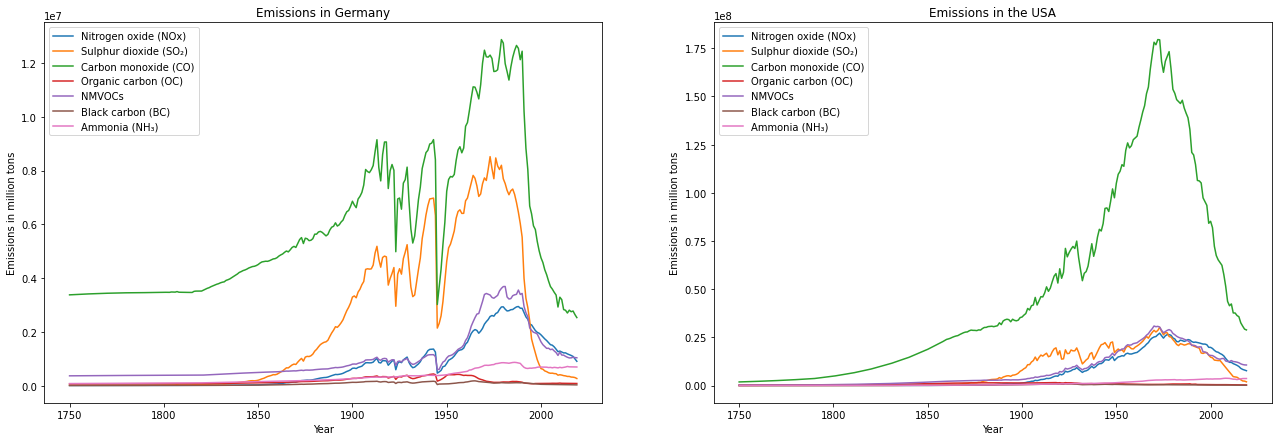

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(22, 7))

df_emmisions[df_emmisions['Entity']=='Germany'].plot(x='Year', ylabel="Emissions in million tons", title='Emissions in Germany', ax=axes[0])
df_emmisions[df_emmisions['Entity']=='United States'].plot(x='Year', ylabel="Emissions in million tons", title='Emissions in the USA', ax=axes[1])

#### 2.2 Data Understanding - Temperature data (FAOSTAT)

In [49]:
# load emmisions data
df_temperature =  pd.read_csv(base_path+"/temperature_data_2019.csv", sep=',')

In [50]:
df_temperature.sample(5)

Domain Code              Domain  Area Code (M49)  \
7567           ET  Temperature change              214   
7933           ET  Temperature change              222   
21166          ET  Temperature change              666   
9732           ET  Temperature change              268   
6021           ET  Temperature change              178   

                            Area  Element Code             Element  \
7567          Dominican Republic          6078  Standard Deviation   
7933                 El Salvador          6078  Standard Deviation   
21166  Saint Pierre and Miquelon          7271  Temperature change   
9732                     Georgia          6078  Standard Deviation   
6021                       Congo          7271  Temperature change   

       Months Code               Months  Year Code  Year Unit  Value Flag  \
7567          7020  Meteorological year       1969  1969   °C  0.271    E   
7933          7020  Meteorological year       1969  1969   °C  0.290    E   
21166         7020  Meteorological year       2021  2021   °C  2.257    E   
9732          7020  Meteorological year       2004  2004   °C    NaN    M   
6021          7020  Meteorological year       2008  2008   °C  0.843    E   

                                        Flag Description  
7567                                     Estimated value  
7933                                     Estimated value  
21166                                    Estimated value  
9732   Missing value (data cannot exist, not applicable)  
6021                                     Estimated value

In [51]:
df_temperature.info()
print("shape:", df_temperature.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27528 entries, 0 to 27527
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       27528 non-null  object 
 1   Domain            27528 non-null  object 
 2   Area Code (M49)   27528 non-null  int64  
 3   Area              27528 non-null  object 
 4   Element Code      27528 non-null  int64  
 5   Element           27528 non-null  object 
 6   Months Code       27528 non-null  int64  
 7   Months            27528 non-null  object 
 8   Year Code         27528 non-null  int64  
 9   Year              27528 non-null  int64  
 10  Unit              27528 non-null  object 
 11  Value             25416 non-null  float64
 12  Flag              27528 non-null  object 
 13  Flag Description  27528 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 2.9+ MB
shape: (27528, 14)


In [52]:
def temperature_df_preperation(df):
    df = df.drop(df[df_temperature.Element == "Standard Deviation"].index)
    df = df.rename(columns={'Value': 'Temperature Change'})
    return df

df_temperature = temperature_df_preperation(df_temperature)

<AxesSubplot:title={'center':'Temperature Change in Germany'}, xlabel='Year', ylabel='°C'>

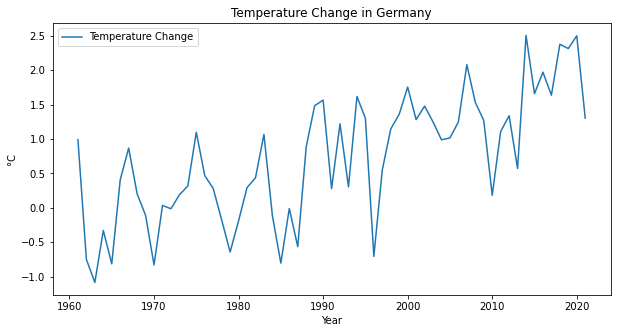

In [53]:
df_temperature[df_temperature['Area']=='Germany'].plot(x='Year', y="Temperature Change", ylabel="°C", figsize=(10, 5), title='Temperature Change in Germany')

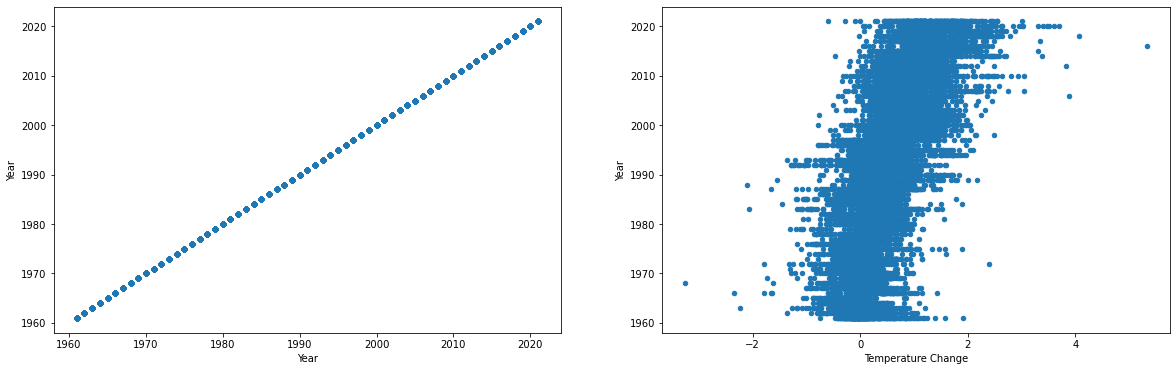

In [54]:
df_temperature_numeric_only = df_temperature.select_dtypes(include=np.number)

df_temperature_zscore = df_temperature_numeric_only.apply(abs_zscore)
threshold = 5
outliers_temperature = df_temperature[(df_temperature_zscore>threshold).any(axis='columns')]
none_outliers_temperature = df_temperature[~(df_temperature_zscore>threshold).any(axis='columns')]

plot_outliers(outliers_temperature[["Year", "Temperature Change"]], none_outliers_temperature[["Year", "Temperature Change"]], 1, 2, (20, 6))

In [55]:
# get top 5 max temperature change outlier
outliers_temperature.sort_values(by=['Temperature Change'], ascending=False).head(5)

Empty DataFrame
Columns: [Domain Code, Domain, Area Code (M49), Area, Element Code, Element, Months Code, Months, Year Code, Year, Unit, Temperature Change, Flag, Flag Description]
Index: []

In [56]:
px.choropleth(data_frame=df_temperature, locationmode='country names', locations='Area',
 color='Temperature Change', animation_frame='Year', title='Annual temperature change per country',
 color_continuous_scale=plotly.express.colors.sequential.Plasma, range_color=(100, 0))

### 3. Data Preparation 

We need to clean columns and rows that are not intresting in both datasets. 

Additionally we want to merge both dataframes for further analysis.

In [57]:
# check for null values in both datasets
print(df_emmisions.isnull().sum())
print(df_temperature[["Year", "Temperature Change", "Area"]].isnull().sum())

# drop null values
df_temperature = df_temperature.dropna()

Nitrogen oxide (NOx)     0
Sulphur dioxide (SO₂)    0
Carbon monoxide (CO)     0
Organic carbon (OC)      0
NMVOCs                   0
Black carbon (BC)        0
Ammonia (NH₃)            0
Entity                   0
Year                     0
dtype: int64
Year                    0
Temperature Change    516
Area                    0
dtype: int64


We want to merge the two dataframes by Year->Year and Entity->Area unfortunaly it looks like not all Entity labels are the same as the Area labels.

In the following cell you can see the non-existing labels in the temperature dataframe, that are missing in the emissions dataframe.
A "difflib" function was used to see the closest matches of missing labels. With this result the temperature dataframe was manually edited to use the same labels as the emission dataframe. But as you can see, not all labels could be found.

In [58]:
# compare Area and Entity in both data sets
import difflib

df_emmisions_countries = df_emmisions.Entity.unique()
df_temperature_countries = df_temperature.Area.unique()

diff_countries = set(df_temperature_countries).difference(set(df_emmisions_countries))

for country in diff_countries:
    print(country, difflib.get_close_matches(country, df_emmisions_countries))
    

Côte d'Ivoire ["Cote d'Ivoire"]
Cocos (Keeling) Islands ['Cook Islands']
Faroe Islands ['Faeroe Islands', 'Cook Islands', 'Marshall Islands']
Netherlands Antilles (former) []
China, mainland ['Cayman Islands', 'Thailand']
Pitcairn []
French Guyana ['French Guiana', 'French Polynesia', 'Guyana']
Isle of Man []
Republic of Korea []
Belgium-Luxembourg ['Luxembourg']
China, Hong Kong SAR ['Hong Kong']
Monaco ['Macao', 'Morocco']
Iran (Islamic Republic of) []
United Kingdom of Great Britain and Northern Ireland []
Antarctica ['Africa']
Viet Nam ['Vietnam']
Türkiye ['Turkey']
United States of America ['United States', 'United States Virgin Islands']
Channel Islands ['Cayman Islands', 'Marshall Islands', 'Faeroe Islands']
Czechoslovakia ['Czechia', 'Slovakia']
China, Taiwan Province of []
Ethiopia PDR ['Ethiopia']
Nauru []
Mayotte []
Timor-Leste ['Timor']
Lao People's Democratic Republic ['Democratic Republic of Congo']
USSR []
Norfolk Island ['Cook Islands', 'Faeroe Islands', 'Solomon Island

In [59]:
# read in edited temperature dataframe
df_temperature =  pd.read_csv(base_path+"/temperature_data_2019_country_corrected.csv", sep=',') 
df_temperature = temperature_df_preperation(df_temperature)
df_temperature = df_temperature.dropna()

# merge data sets
new_df = pd.merge(df_emmisions, df_temperature,  how='inner', left_on=['Entity','Year'], right_on = ['Area','Year'])

In [60]:
# remove unnecessary columns
new_merged_df = new_df[['Nitrogen oxide (NOx)', 'Sulphur dioxide (SO₂)', 'Carbon monoxide (CO)','Organic carbon (OC)', 'NMVOCs', 'Black carbon (BC)', 'Ammonia (NH₃)', 'Year', 'Temperature Change', 'Entity']]
new_df.columns, new_merged_df.columns

(Index(['Nitrogen oxide (NOx)', 'Sulphur dioxide (SO₂)', 'Carbon monoxide (CO)',
        'Organic carbon (OC)', 'NMVOCs', 'Black carbon (BC)', 'Ammonia (NH₃)',
        'Entity', 'Year', 'Domain Code', 'Domain', 'Area Code (M49)', 'Area',
        'Element Code', 'Element', 'Months Code', 'Months', 'Year Code', 'Unit',
        'Temperature Change', 'Flag', 'Flag Description'],
       dtype='object'),
 Index(['Nitrogen oxide (NOx)', 'Sulphur dioxide (SO₂)', 'Carbon monoxide (CO)',
        'Organic carbon (OC)', 'NMVOCs', 'Black carbon (BC)', 'Ammonia (NH₃)',
        'Year', 'Temperature Change', 'Entity'],
       dtype='object'))

Let's create a simple linear correlation heatmap. Between the pollution values and the temperature change value. 
The data is currently not grouped by country. 

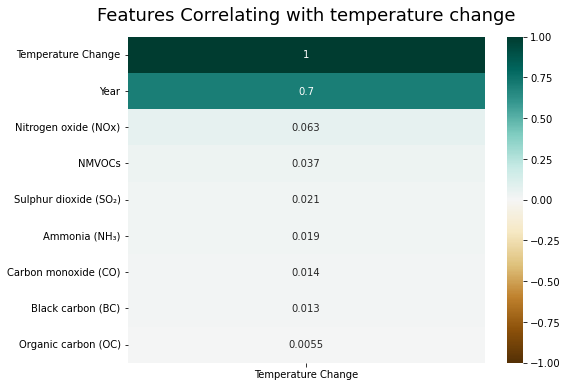

In [61]:
plt.figure(figsize=(8, 6))
new_df_cols = new_df[['Nitrogen oxide (NOx)', 'Sulphur dioxide (SO₂)', 'Carbon monoxide (CO)','Organic carbon (OC)', 'NMVOCs', 'Black carbon (BC)', 'Ammonia (NH₃)', 'Year', 'Temperature Change', 'Entity']]
heatmap = sn.heatmap(new_df_cols.corr()[['Temperature Change']].sort_values(by='Temperature Change', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with temperature change', fontdict={'fontsize':18}, pad=16);


Let's try this correlation analysis with data that comes only from the country the emission were produced in. 

<AxesSubplot:title={'center':'Data Germany'}, xlabel='Year'>

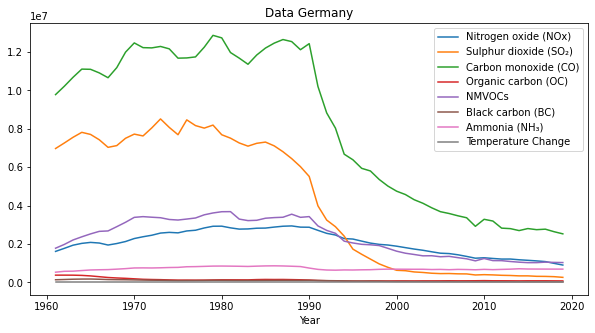

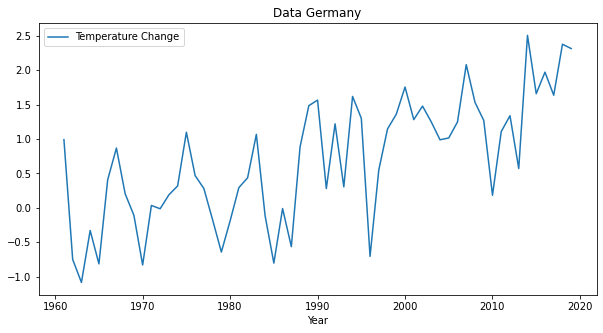

In [62]:

new_df_cols[new_df_cols['Entity']=='Germany'].plot(x='Year', figsize=(10, 5), title='Data Germany')
new_df_cols[new_df_cols['Entity']=='Germany'].plot(x='Year', y="Temperature Change", figsize=(10, 5), title='Data Germany')

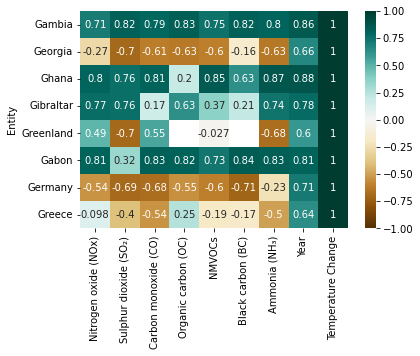

In [63]:
# create a correlation heatmap for the individual countries
corrs_per_country = new_df_cols.groupby(['Entity']).corrwith(new_df_cols['Temperature Change'])
heatmap = sn.heatmap(corrs_per_country.iloc[65:73].sort_values(by='Temperature Change', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [64]:
# define final dataframe for data modelling
df_prepared = new_df[['Nitrogen oxide (NOx)', 'Sulphur dioxide (SO₂)', 'Carbon monoxide (CO)','Organic carbon (OC)', 'NMVOCs', 'Black carbon (BC)', 'Ammonia (NH₃)', 'Year', 'Entity', 'Temperature Change']]

In [65]:
# prepare a model (58 Years of data per country) and leave out 2019 for later evaluation
df_regression_germany = df_prepared[(df_prepared['Entity']=='Germany') & (df_prepared['Year']<2019)].sort_values(['Entity', 'Year'])
df_regression_all = df_prepared[(df_prepared['Year']<2019)].sort_values(['Entity', 'Year'])

df_evaluation_germany = df_prepared[(df_prepared['Entity']=='Germany') & (df_prepared['Year']>=2019)].sort_values(['Entity', 'Year'])
df_evaluation_all = df_prepared[(df_prepared['Year']>=2019)].sort_values(['Entity', 'Year'])


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

scaler = MinMaxScaler()

df_regression_x = df_regression_germany[['Nitrogen oxide (NOx)', 'Sulphur dioxide (SO₂)', 'Carbon monoxide (CO)','Organic carbon (OC)', 'NMVOCs', 'Black carbon (BC)', 'Ammonia (NH₃)', 'Year']]
df_regression_y = df_regression_germany[['Temperature Change']]
X_train, X_test, y_train, y_test = train_test_split(df_regression_x, df_regression_y, test_size=0.2, random_state=42, shuffle=True)

# later used for evaluation
X_test_original = X_test.copy()

# min max scale data between 0 and 1
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

### 4. Modeling

Use a machine learning "Random Forest" model for regression.

Tune Hyperparameters with random cv search. (reaches gradient descent for best values faster)

<cite>Deep Learning - Bengio, Goodfellow, Courville</cite>

For the regression a simple RandomForestRegressor from the sklearn lib was used.

<cite>https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html</cite>

A Random Forest is a type of machine learning algorithm that builds multiple decision trees (hence "forest") and combines their predictions to classify new data points. Each decision tree is built using a random sample of the data and a random subset of the features, which helps to reduce overfitting and improve the overall accuracy of the model. The final prediction is made by taking a majority vote of the predictions from all the decision trees in the forest. It is called random because it randomly selects observations and features to build decision trees.

<cite>https://towardsdatascience.com/understanding-random-forest-58381e0602d2</cite>



In [67]:
# random search for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 4, stop = 50, num = 4)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 2)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 4, 8]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}

# First create the base model to tune
rf = RandomForestRegressor()
# Use the random grid to search for best hyperparameters
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 3, cv = 3, verbose=0, random_state=42, n_jobs = -1)
# Fit the random search model (ravel is used to flatten the y_train array)
rf_random.fit(X_train, y_train.ravel())

best_params = rf_random.best_params_
print(best_params)

{'n_estimators': 34, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}


In [68]:
# RandomForrestRegressor
print(best_params)
#regressor = RandomForestRegressor(n_estimators=best_params['n_estimators'], min_samples_split=best_params['min_samples_split'], min_samples_leaf=best_params['min_samples_leaf'], max_features=best_params['max_features'], max_depth=best_params['max_depth'], bootstrap=best_params['bootstrap'])

# actual model that will be using for the evaluation
regressor = RandomForestRegressor(n_estimators=4, min_samples_split=2, min_samples_leaf=4, max_features="sqrt", max_depth=10, bootstrap=False)

regressor.fit(X_train, y_train.ravel())

{'n_estimators': 34, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}


RandomForestRegressor(bootstrap=False, max_depth=10, max_features='sqrt',
                      min_samples_leaf=4, n_estimators=4)

<AxesSubplot:title={'center':'Feature importance'}>

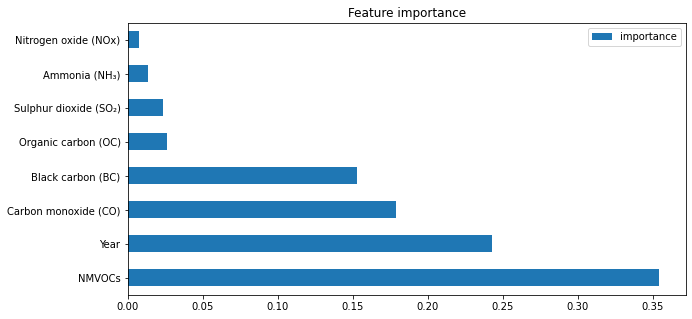

In [69]:
feature_importances = pd.DataFrame(regressor.feature_importances_,
                                      index = df_regression_x.columns,
                                        columns=['importance']).sort_values('importance', ascending=False)
feature_importances.plot(kind='barh', figsize=(10, 5), title='Feature importance')

### 5. Evaluation

In [70]:
# predict values
y_pred = regressor.predict(X_test)

# rescale results and reshape to 2d array
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
X_test_rescaled = scaler.inverse_transform(X_test.reshape(-1, 1))

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

# add Temperature Change Prediction to X_test_original
X_test_original['Temperature Change Prediction'] = y_pred
X_test_original['Temperature Change'] = y_test_rescaled

print(X_test_original[['Year', 'Temperature Change', 'Temperature Change Prediction']])



Mean Squared Error: 0.30299213069759895
      Year  Temperature Change  Temperature Change Prediction
3730  1961               0.990                       0.450187
3735  1966               0.406                      -0.288325
3764  1995               1.301                       0.527167
3743  1974               0.318                       0.016167
3774  2005               1.015                       1.184339
3782  2013               0.571                       1.548364
3767  1998               1.146                       0.761086
3755  1986              -0.011                      -0.120188
3776  2007               2.080                       1.184339
3742  1973               0.188                      -0.398988
3778  2009               1.270                       1.103250
3733  1964              -0.330                      -0.397196


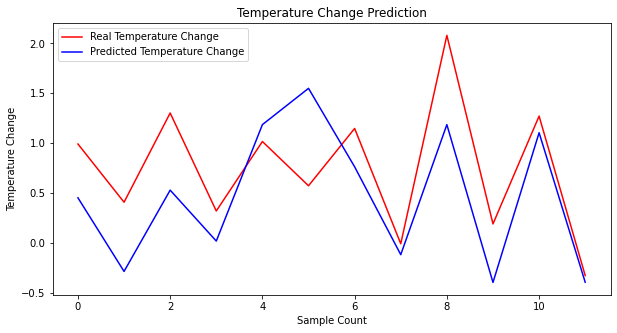

In [71]:
# plot results
plt.figure(figsize=(10, 5))
plt.plot(y_test_rescaled, color = 'red', label = 'Real Temperature Change')
plt.plot(y_pred, color = 'blue', label = 'Predicted Temperature Change')
plt.title('Temperature Change Prediction')
plt.xlabel('Sample Count')
plt.ylabel('Temperature Change')
plt.legend()
plt.show()

In [72]:
def model_by_country(df):
    df_regression_x = df[['Nitrogen oxide (NOx)', 'Sulphur dioxide (SO₂)', 'Carbon monoxide (CO)','Organic carbon (OC)', 'NMVOCs', 'Black carbon (BC)', 'Ammonia (NH₃)', 'Year']]
    df_regression_y = df[['Temperature Change']]
    X_train, X_test, y_train, y_test = train_test_split(df_regression_x, df_regression_y, test_size=0.2, random_state=42, shuffle=True)
    
    regressor = RandomForestRegressor(n_estimators=4, min_samples_split=2, min_samples_leaf=4, max_features="sqrt", max_depth=10, bootstrap=False)
    return regressor.fit(X_train, y_train.values.ravel())
    

model = df_prepared.sort_values(['Entity', 'Year']).groupby(['Entity']).apply(model_by_country)
model = model.reset_index()
model = model.rename(columns={0: 'Temperature Change Model'})

In [73]:
results_2019 = []

for index, row in df_evaluation_all.iterrows():
    row_x = [row['Nitrogen oxide (NOx)'], row['Sulphur dioxide (SO₂)'], row['Carbon monoxide (CO)'], row['Organic carbon (OC)'], row['NMVOCs'], row['Black carbon (BC)'], row['Ammonia (NH₃)'], row['Year']]
    row_y = row['Temperature Change']
    model_country = model[(model['Entity']==row['Entity'])]
    prediction = model_country.iloc[0]["Temperature Change Model"].predict([row_x])
    difference = np.abs(prediction - row_y)
    error = difference / prediction
    mean_squared_error = np.mean(error)
    results_2019.append([row['Entity'], row['Year'], prediction[0], row_y, mean_squared_error])


# results_2019 to dataframe
df_results_2019 = pd.DataFrame(results_2019, columns=['Entity', 'Year', 'Prediction', 'Real', 'Mean Squared Error'])

# df_results_2019 avg for Mean Squared Error
print("Error across all countries:",df_results_2019['Mean Squared Error'].mean())


Error across all countries: 0.16079648130291038


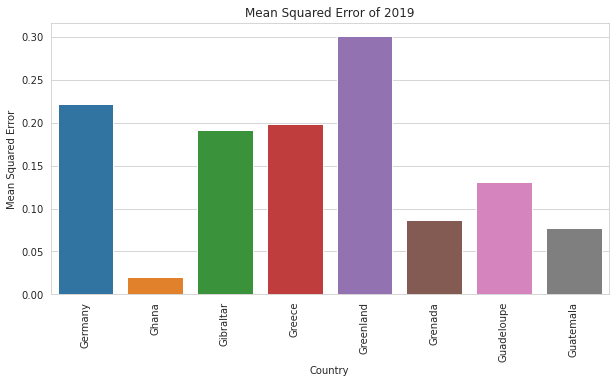

In [74]:
# plot results of 2019
plt.figure(figsize=(10, 5))
sn.set_style("whitegrid")
sn.barplot(x="Entity", y="Mean Squared Error", data=df_results_2019[68:76])
plt.xticks(rotation=90)
plt.title('Mean Squared Error of 2019')
plt.xlabel('Country')
plt.ylabel('Mean Squared Error')
plt.show()

So what does this result mean for our original question "We see that the original question "Does the air pollution of a country have a direct influence on the annual average temperature?" ? 

We can see that it is possible for some countries better for others worse to use the emission values of the current year to predict the temperature change of the country. That means emissions or air pollution can or have a effect on our climate/temperature.

### 6. Deployment

Now we would like to make our country based prediction models available for scientist. So that they can use measured emission values of their country to predict the temperature change for a year.

Therefore we will use flask a simple python web framework to make this possible. 

<cite>https://flask.palletsprojects.com/en/2.2.x/</cite>

In [75]:
# pandas save model dataframe pickle
model.to_pickle("model.pkl")